In [39]:
!unzip 'raw_data/od_20230901_10.zip' -d 'raw_data/od_20230901_10'
!unzip 'raw_data/od_20230911_20.zip' -d 'raw_data/od_20230911_20'
!unzip 'raw_data/od_20230921_30.zip' -d 'raw_data/od_20230921_30'
!unzip 'raw_data/od_20231001_15.zip' -d 'raw_data/od_20231001_15'



Archive:  raw_data/od_20230911_20.zip
  inflating: raw_data/od_20230911_20/od_20230911_1.csv  
  inflating: raw_data/od_20230911_20/od_20230912_1.csv  
  inflating: raw_data/od_20230911_20/od_20230913_1.csv  
  inflating: raw_data/od_20230911_20/od_20230914_1.csv  
  inflating: raw_data/od_20230911_20/od_20230915_1.csv  
  inflating: raw_data/od_20230911_20/od_20230916_1.csv  
  inflating: raw_data/od_20230911_20/od_20230917_1.csv  
  inflating: raw_data/od_20230911_20/od_20230918_1.csv  
  inflating: raw_data/od_20230911_20/od_20230919_1.csv  
  inflating: raw_data/od_20230911_20/od_20230920_1.csv  
Archive:  raw_data/od_20230921_30.zip
  inflating: raw_data/od_20230921_30/od_20230921_1.csv  
  inflating: raw_data/od_20230921_30/od_20230922_1.csv  
  inflating: raw_data/od_20230921_30/od_20230923_1.csv  
  inflating: raw_data/od_20230921_30/od_20230924_1.csv  
  inflating: raw_data/od_20230921_30/od_20230925_1.csv  
  inflating: raw_data/od_20230921_30/od_20230926_1.csv  
  inflating:

In [1]:
!unzip 'geoshp.zip' -d 'geoshp'

Archive:  geoshp.zip
  inflating: geoshp/ctprvn.dbf       
  inflating: geoshp/ctprvn.shp       
  inflating: geoshp/ctprvn.shx       
  inflating: geoshp/emd.dbf          
  inflating: geoshp/emd.shp          
  inflating: geoshp/emd.shx          
  inflating: geoshp/KIKmix_20230701.csv  
  inflating: geoshp/li.dbf           
  inflating: geoshp/li.shp           
  inflating: geoshp/li.shx           
  inflating: geoshp/sig.dbf          
  inflating: geoshp/sig.shp          
  inflating: geoshp/sig.shx          


# OD 데이터 검색 및 기초 시각화 도구

# 사용법

1. 별첨된 'geoshp'압축 파일을 주피터 노트북과 같은 폴더에 넣고 'geoshp' 폴더에 압축 해제
2. 주피터 노트북과 같은 폴더에 raw_data 폴더 생성 후 그 아래에 od 로우데이터 각각 폴더명 아래 압축 해제
3. 도구 본체 코드란에 희망하는 사항 검색, 출력된 그래프 확인
4. 출력한 그래프는 testbed 폴더에 임의의 숫자의 이름으로 저장됨.

# 백그라운드 코드

In [41]:
import json
import folium
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString
import os

if not os.path.exists('testbed'):
    os.mkdir('testbed')
if not os.path.exists('raw_data'):
    os.mkdir('raw_data')

In [42]:
# 읍면동, 리, 시군구, 시도 경계 데이터 불러오기
# crs: 좌표 인코딩; epsg: 인코딩 방식
# 5179=주어진 데이터 인코딩 방식, 4326: 위경도
emd = gpd.read_file('geoshp/emd.shp', encoding = 'cp949').set_crs('epsg:5179')
lii = gpd.read_file('geoshp/li.shp', encoding = 'cp949').set_crs('epsg:5179')
sgd = gpd.read_file('geoshp/ctprvn.shp', encoding = 'cp949').set_crs('epsg:5179')
sig = gpd.read_file('geoshp/sig.shp', encoding = 'cp949').set_crs('epsg:5179')

emd['geometry'] = emd['geometry'].to_crs(epsg=4326)
lii['geometry'] = lii['geometry'].to_crs(epsg=4326)
sgd['geometry'] = sgd['geometry'].to_crs(epsg=4326)
sig['geometry'] = sig['geometry'].to_crs(epsg=4326)

emd['centroid'] = emd['geometry'].geometry.centroid
lii['centroid'] = lii['geometry'].geometry.centroid
sgd['centroid'] = sgd['geometry'].geometry.centroid
sig['centroid'] = sig['geometry'].geometry.centroid


<ipython-input-42-ac94f58d4461>:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  emd['centroid'] = emd['geometry'].geometry.centroid
<ipython-input-42-ac94f58d4461>:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lii['centroid'] = lii['geometry'].geometry.centroid
<ipython-input-42-ac94f58d4461>:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sgd['centroid'] = sgd['geometry'].geometry.centroid
<ipython-input-42-ac94f58d4461>:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometri

In [43]:
# 필요한 읍면동, 리 데이터 추출 후 병합
# centroid: 경계 데이터의 중심점
emd.columns = ['cd', 'eng_nm', 'kor_nm', 'geometry', 'centroid']
emd['cd'] = emd['cd'].astype(int)
emd['cd'] *= 100
lii.columns = ['cd', 'eng_nm', 'kor_nm', 'geometry', 'centroid']
lii['cd'] = lii['cd'].astype(int)
korea_map_emdli = gpd.GeoDataFrame(pd.concat((emd, lii)), crs='epsg:4326')
korea_map_emdli.set_index('cd', inplace=True)
korea_map_emdli.head()
hd_keys = korea_map_emdli[['centroid', 'kor_nm']].to_dict('index')

In [44]:
# 주어진 행정동코드-법정동코드 변환 자료
# 행정동코드만 주어졌을 경우 가장 위 법정동코드로 변환
given_keys = pd.read_csv('geoshp/KIKmix_20230701.csv')
given_keys.set_index('행정동코드', inplace=True)
hd_to_bd = given_keys[~given_keys.index.duplicated(keep='first')].to_dict('index')
#given_keys.reset_index(inplace=True)
given_keys.fillna('', inplace=True)

<ipython-input-44-e188dcff1555>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  given_keys.fillna('', inplace=True)


In [45]:
# 법정동코드 존재 여부 체크
lst = []
nones=[]
none_gun=[]
for row in given_keys.iterrows():
    code = row[1]['법정동코드']
    try:
        temp = hd_keys[code]
    except:
        if code % 10000 != 0:
            lst.append(code)
            nones.append('_'.join([row[1]['시도명'],row[1]['시군구명'],row[1]['읍면동명'],row[1]['동리명']]))
            none_gun.append(row[1]['읍면동명'])
print(lst)
print(len(lst))
print(nones)

[4159014000, 4180033033, 4180033034, 4180033035, 4180033036, 4180033037, 4180033038, 4180033040, 4180033041, 4180035032, 4180035033, 4180035034, 4180035036, 4180035037, 4180035038, 4180036026, 4180037028, 4180037030, 4518032031, 4682025038, 5011025301, 5011025302, 5011025303, 5011025304, 5011025305, 5011025306, 5011025307, 5011025391, 5011025392, 5011025393, 5011031031, 5011031032, 5011031033, 5011033022, 5011033023, 5011033024, 5011033025, 5013025901, 5013031001, 5178035022, 5178035023, 5178036021, 5178036022, 5178036024, 5178036025, 5178036026, 5178036027, 5178036029, 5178037021, 5178037022, 5178037023, 5181034026, 5181034027]
53
['경기도_화성시_새솔동_새솔동', '경기도_연천군_백학면_석주원리', '경기도_연천군_백학면_상리', '경기도_연천군_백학면_중리', '경기도_연천군_백학면_하리', '경기도_연천군_백학면_오음리', '경기도_연천군_백학면_사시리', '경기도_연천군_백학면_고읍리', '경기도_연천군_백학면_두매리', '경기도_연천군_왕징면_임강리', '경기도_연천군_왕징면_오탄리', '경기도_연천군_왕징면_귀존리', '경기도_연천군_왕징면_장학리', '경기도_연천군_왕징면_가천리', '경기도_연천군_왕징면_냉정리', '경기도_연천군_신서면_승양리', '경기도_연천군_중면_진곡리', '경기도_연천군_중면_적동산리', '전라북도_정읍시_입암면_대흥리', 

In [46]:
# 리->읍면동 존재 여부 체크
# 새솔동 외 모든 코드: //100*100시 1단계 위, 코드 존재함
nowhere = []
for area, code in zip(none_gun, lst):
    tt = korea_map_emdli[korea_map_emdli.eq(area).any(axis=1)]
    print(tt['kor_nm'].values.tolist(), tt.index.values.tolist(), [x-code for x in tt.index.values.tolist()])
    if not sum(korea_map_emdli.eq(area).any(axis=1)):
        nowhere.append(area)
print(nowhere)

[] [] []
['백학면'] [4180033000] [-33]
['백학면'] [4180033000] [-34]
['백학면'] [4180033000] [-35]
['백학면'] [4180033000] [-36]
['백학면'] [4180033000] [-37]
['백학면'] [4180033000] [-38]
['백학면'] [4180033000] [-40]
['백학면'] [4180033000] [-41]
['왕징면'] [4180035000] [-32]
['왕징면'] [4180035000] [-33]
['왕징면'] [4180035000] [-34]
['왕징면'] [4180035000] [-36]
['왕징면'] [4180035000] [-37]
['왕징면'] [4180035000] [-38]
['신서면'] [4180036000] [-26]
['중면'] [4180037000] [-28]
['중면'] [4180037000] [-30]
['입암면', '입암면'] [4518032000, 4776031000] [-31, 257998969]
['해남읍'] [4682025000] [-38]
['애월읍'] [5011025300] [-1]
['애월읍'] [5011025300] [-2]
['애월읍'] [5011025300] [-3]
['애월읍'] [5011025300] [-4]
['애월읍'] [5011025300] [-5]
['애월읍'] [5011025300] [-6]
['애월읍'] [5011025300] [-7]
['애월읍'] [5011025300] [-91]
['애월읍'] [5011025300] [-92]
['애월읍'] [5011025300] [-93]
['한경면'] [5011031000] [-31]
['한경면'] [5011031000] [-32]
['한경면'] [5011031000] [-33]
['우도면'] [5011033000] [-22]
['우도면'] [5011033000] [-23]
['우도면'] [5011033000] [-24]
['우도면'] [5011033000] [-25

In [47]:
# 새솔동은 시각화 데이터가 없으므로 남양읍으로 대체
korea_map_emdli[korea_map_emdli.eq('남양읍').any(axis=1)]

,eng_nm,kor_nm,geometry,centroid
cd,,,,
4159026200,Namyang-eup,남양읍,"MULTIPOLYGON (((126.79805 37.17035, 126.7978 3...",POINT (126.82181 37.20821)


In [48]:
# 또한, 거북섬동은 코드 데이터에 존재하지 않기에 정왕동으로 대체

In [49]:
# origin-dest 간 직선 생성
def find_line(oricd, descd):
    ori_coor = None
    des_coor = None
    def find_coor(cd):
        # 새솔동은 남양읍으로 대체
        if cd in [4159014000, 4159051500]:
           return hd_keys[4159026200]['centroid']
        # 거북섬동은 정왕동으로 대체
        # 거북섬동은 정왕동에서 분리된 새 행정동
        if cd == 4139065000:
            return hd_keys[4139013200]['centroid']
        try:
            # 행정동코드 기반
            return hd_keys[cd]['centroid']
        except:
            try:
                # 법정동코드 기반
                return hd_keys[hd_to_bd[cd]['법정동코드']]['centroid']
            except:
                # 리->읍면동
                try:
                    return hd_keys[(cd//100)*100]['centroid']
                except:
                    if cd != 4139065000:
                        print(cd)
                    return hd_keys[4159026200]['centroid']
    ori_coor = find_coor(oricd)
    des_coor = find_coor(descd)
    return LineString([ori_coor, des_coor])


In [ ]:
# 각 csv파일을 개별 데이터프레임으로 생성

folder_path = 'raw_data'
DFS = {}
for folder in os.listdir(folder_path):
    if not os.path.isdir(os.path.join(folder_path, folder)):
        continue
    temp_path = os.path.join(folder_path, folder)
    for filename in os.listdir(temp_path):
        if filename.endswith(".csv"):
            filepath = os.path.join(temp_path, filename)
            df_name = os.path.splitext(filename)[0]  # Remove file extension
            DFS[df_name] = pd.read_csv(filepath)

In [ ]:
DFS.keys()

In [ ]:
# 검색기 함수
# area: 시도명_시군구명_읍면동명_동리명 : 끝까지 안 채워도 됨
# 예: 서울특별시_종로구_청운효자동_청운동: O
# 예: 서울특별시: O
# 예: 서울특별시_종로구_청운동: X
# date: MMDD 4개 숫자 붙여서 문자열 숫자 1개여도 리스트로 전달.
# keywords = ori_only, dest_only, start_time, end_time, gender: 동일
# age, modal, origin_purpose, dest_purpose, od_dist_avg, : 범위(리스트, range)
# od_duration_avg, od_cnts : 범위(list, range)


def searcher(**kwargs):
    target_dfs = []
    target_codes = None
    rt_df = pd.DataFrame()
    if not kwargs:
        print("No arguments provided")
        return target_dfs
    if kwargs.get('area'):
        parsed = kwargs['area'].split('_')
        if parsed[2].endswith('구'):
            parsed[1] = ' '.join([parsed[1], parsed[2]])
            parsed.pop(2)
        tempdf = given_keys.reset_index()
        for item in parsed:
            tempdf = tempdf[tempdf.eq(item).any(axis=1)]
        target_codes = tempdf['법정동코드'].values.tolist()
        target_codes = set(target_codes)
        target_codes.update(tempdf['행정동코드'].values.tolist())
    if kwargs.get('date'):
        for date in kwargs['date']:
            target_dfs.append(DFS['od_2023'+date+'_1'])
    else:
        target_dfs = DFS.values()
    for item in target_dfs:
        if target_codes:
            if kwargs.get('ori_only'):
                query = item['origin_hdong_cd'].isin(target_codes)
            elif kwargs.get('dest_only'):
                query = item['dest_hdong_cd'].isin(target_codes)
            else:
                query = item['origin_hdong_cd'].isin(target_codes)|item['dest_hdong_cd'].isin(target_codes)
            temp = item[query]
            rt_df = pd.concat([rt_df, temp])
        else:
            rt_df = pd.concat([rt_df, item])
    if kwargs.get('start_time'):
        rt_df = rt_df[rt_df['start_time'].str.startswith(kwargs['start_time'])]
    if kwargs.get('end_time'):
        rt_df = rt_df[rt_df['end_time'].str.startswith(kwargs['end_time'])]
    if kwargs.get('gender'):
        rt_df = rt_df[rt_df['gender'] == kwargs['gender']]
    if kwargs.get('age'):
        rt_df = rt_df[rt_df['age'].isin(kwargs['age'])]
    if kwargs.get('modal'):
        rt_df = rt_df[rt_df['modal'].isin(kwargs['modal'])]
    if kwargs.get('origin_purpose'):
        rt_df = rt_df[rt_df['origin_purpose'].isin(kwargs['origin_purpose'])]
    if kwargs.get('dest_purpose'):
        rt_df = rt_df[rt_df['dest_purpose'].isin(kwargs['dest_purpose'])]
    if kwargs.get('od_dist_avg'):
        rt_df = rt_df[rt_df['od_dist_avg'].isin(kwargs['od_dist_avg'])]
    if kwargs.get('od_duration_avg'):
        rt_df = rt_df[rt_df['od_duration_avg'].isin(kwargs['od_duration_avg'])]
    if kwargs.get('od_cnts'):
        rt_df = rt_df[rt_df['od_cnts'].isin(kwargs['od_cnts'])]
    if kwargs.get('custom_query'):
        rt_df = rt_df
    return rt_df

In [ ]:
exp_no = 0
def generate_map(rt_df, show=True):
    global exp_no
    testdf = rt_df[['origin_hdong_cd', 'dest_hdong_cd', 'od_cnts']]
    lines = testdf.apply(lambda x: find_line(x['origin_hdong_cd'], x['dest_hdong_cd']), axis=1)
    testdf = pd.DataFrame(lines)
    testdf.columns = ['geometry']
    testdf['od_cnts'] = rt_df['od_cnts'].values
    testdf = gpd.GeoDataFrame(testdf, crs='epsg:4326')
    if len(testdf)<100000:
        testdf.sort_values(by='od_cnts', ascending=True, inplace=True)
    fig3, ax = plt.subplots(figsize=(10,10))
    sgd.plot(ax = ax, color='gray')
    testdf.plot(ax = ax, column='od_cnts', legend=True)
    plt.savefig(f'testbed/{exp_no}.png')
    exp_no += 1
    if show:
        plt.show()
    return testdf

# 도구 본체

In [35]:
# 검색기 함수
# area: 시도명_시군구명_읍면동명_동리명 : 끝까지 안 채워도 됨, 건너뛰면 안 됨
# 예: 서울특별시_종로구_청운효자동_청운동: O
# 예: 서울특별시: O
# 예: 서울특별시_종로구_청운동: X
# date: MMDD 4개 숫자 붙여서, 숫자 1개여도 리스트로 전달.
# keywords = area, date, ori_only(bool), dest_only(bool), start_time(str), end_time(str), gender(0,1): 동일
# age(list), modal(list), origin_purpose(list), dest_purpose(list), od_dist_avg(range), : 범위(리스트, range)
# od_duration_avg(range), od_cnts(range) : 범위(list, range)

area = '경기도_고양시_일산서구_가좌동'
date = ['0901']
#ori_only = True
dest_only = True
#start_time = '13:00'
#end_time = '20:00'
#gender = 0
#age = [0,1,2,3,4]
#modal = [0,1,2,3,4]
#origin_purpose = [0,1,2,3,4,5,6,7,8,9]
#dest_purpose = [0,1,2,3,4,5,6,7,8,9]
#od_dist_avg = range(10, 500)
#od_duration_avg = range(10, 500)
#od_cnts = range(10, 500)

mined_data = searcher(area=area,date=date, dest_only=dest_only)

In [ ]:
# 날짜별 사진 1개
dates = ['09'+x for x in [str(y) for y in range(1, 31)]]
dates.extend(['10'+x for x in [str(y) for y in range(1, 16)]])
for dd in dates:
    area = '경기도_고양시_일산서구_가좌동'
    date = [dd]
    dest_only = True
    mined_data = searcher(area=area,date=date, dest_only=dest_only)
    lines_drawn = generate_map(mined_data, show=False)

In [36]:
mined_data.head()

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
10731,4128761000,4128758000,20230901,11:00,11:00,1,1,0.0,0.0,0,4653,13,9
13091,4128761000,4157055000,20230901,12:00,12:00,0,0,0.0,0.0,4,46510,26,10
18605,4128761000,4148054000,20230901,18:00,19:00,1,0,1.0,4.0,0,12181,18,10
21004,4128761000,4128755000,20230901,12:00,12:00,0,1,0.0,2.0,3,31666,33,11
23911,4128761000,4128756000,20230901,18:00,19:00,0,0,0.0,0.0,4,37128,30,49


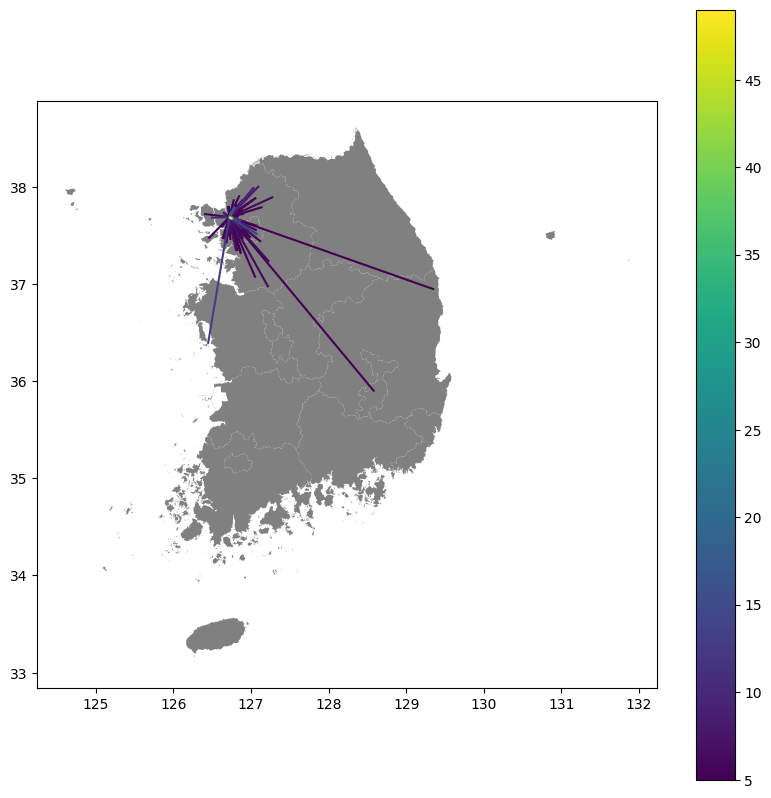

In [37]:
lines_drawn = generate_map(mined_data)